In [1]:
import os
import sys
from pathlib import Path

ASL = os.path.join(str(Path.home()), "ASL")
src = os.path.join(str(Path.home()), "ASL", "src")
os.chdir( ASL )
sys.path.append(ASL)
sys.path.append(src)


from lightning import Network
from utils_asl import load_yaml
from visu import Visualizer

vi = Visualizer(p_visu="test")

textwidth = 12.7 #cm


import matplotlib
import matplotlib.pyplot as plt
import skimage
from PIL import Image, ImageDraw
import imageio 
import numpy as np
import torch
import cv2
import pandas
from visu import *

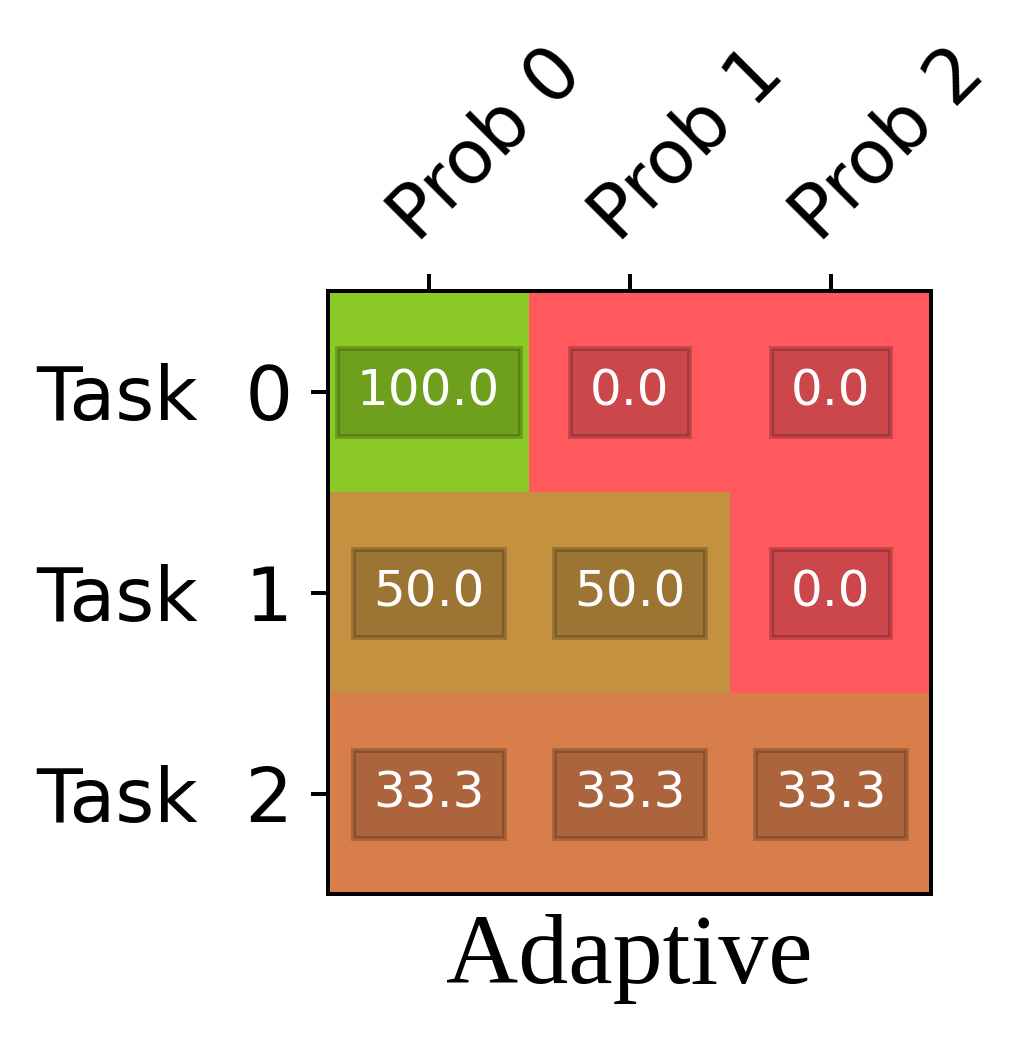

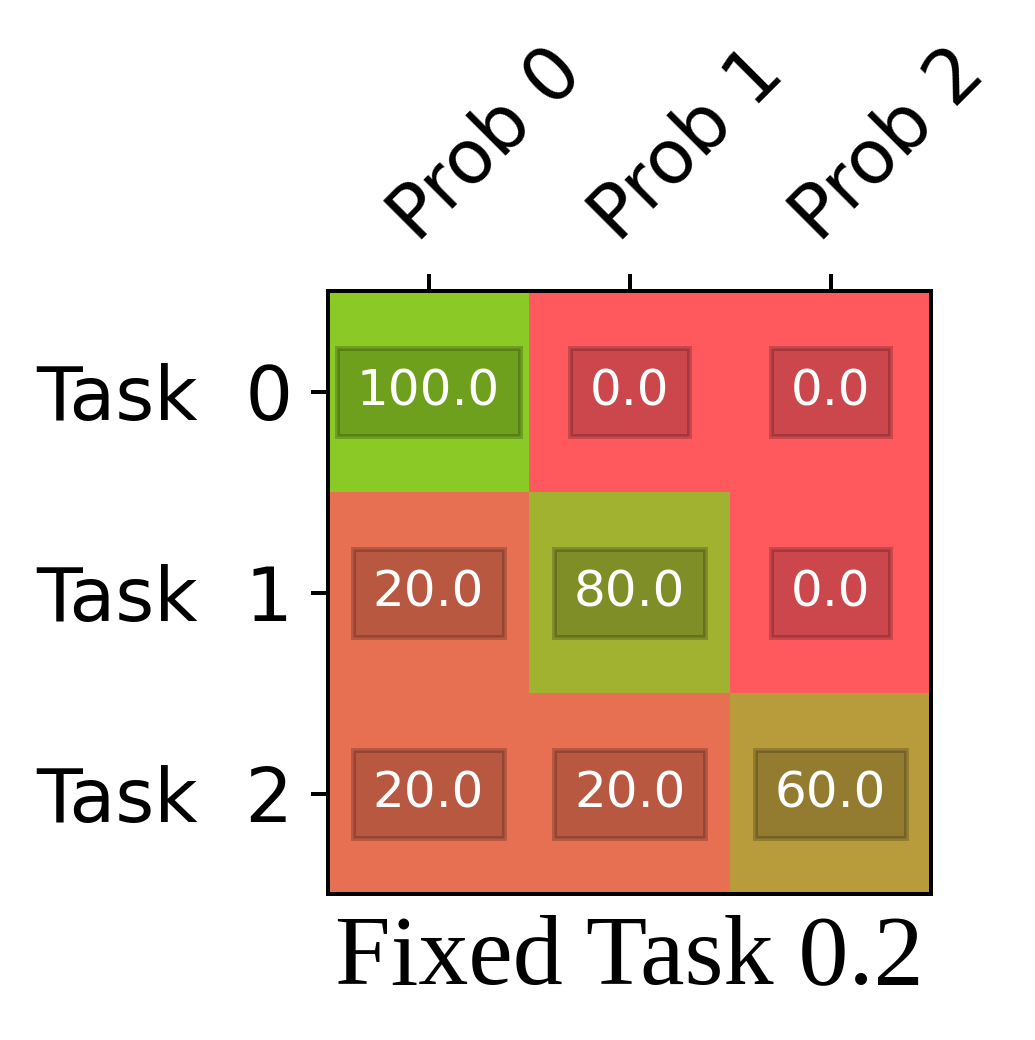

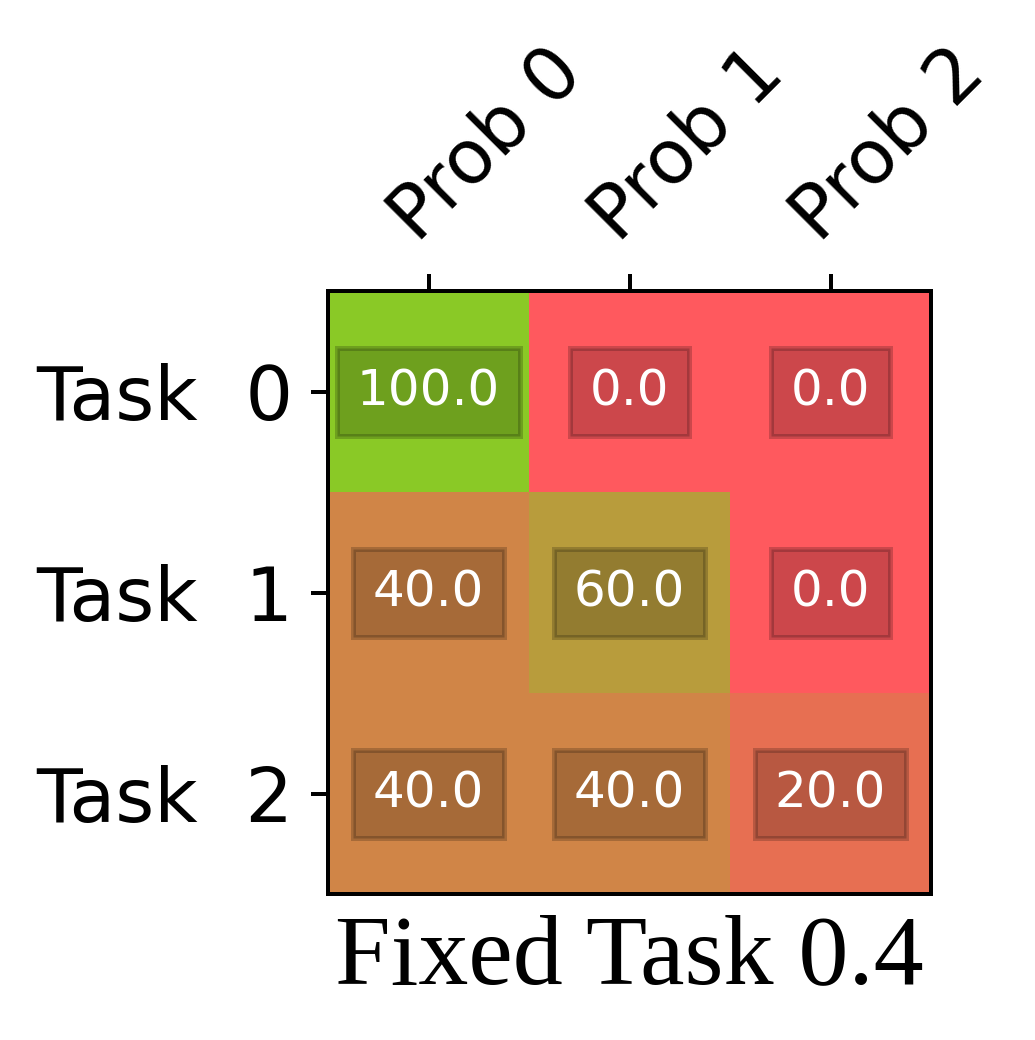

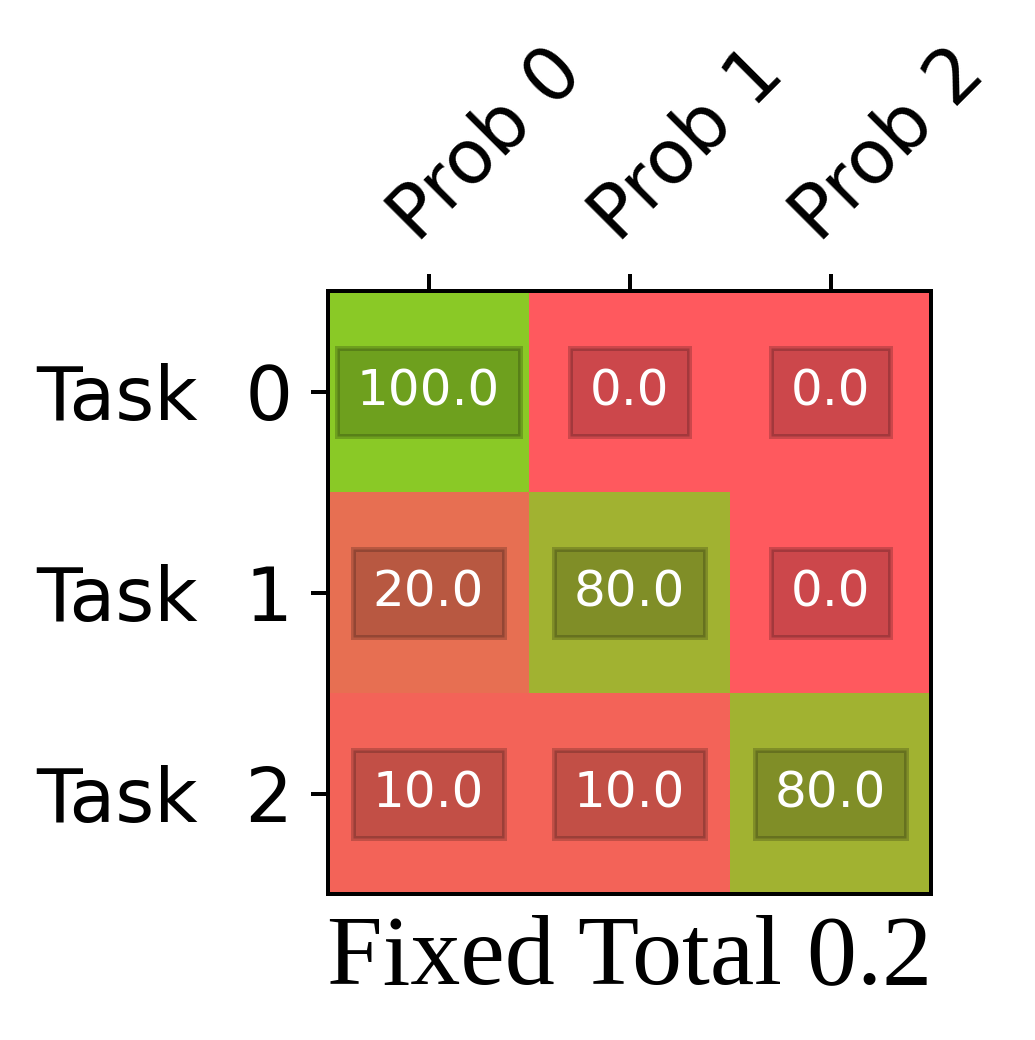

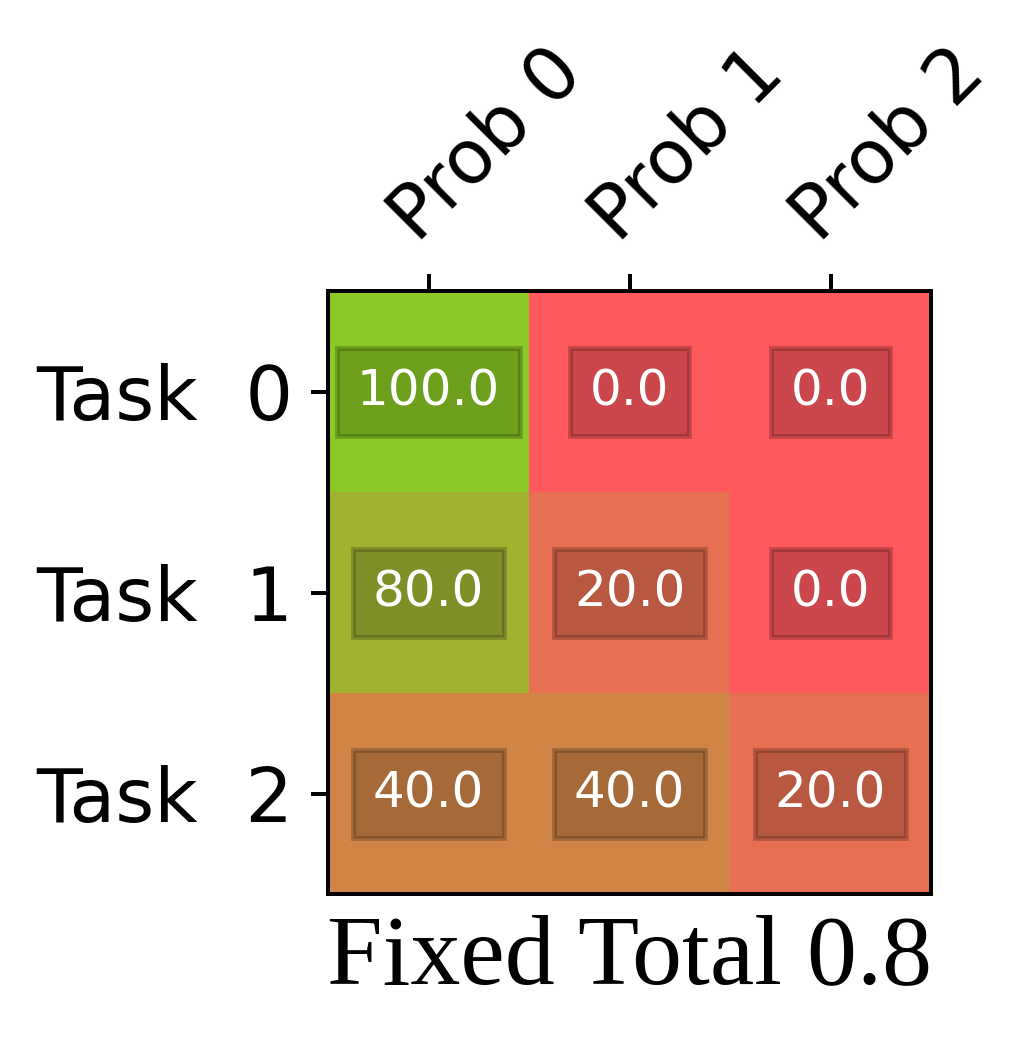

In [81]:
from visu import MainVisualizer
from matplotlib import cm
main_vi = MainVisualizer(p_visu="test",store=False)
from matplotlib.colors import LinearSegmentedColormap

w = LinearSegmentedColormap.from_list('w', [(255/255, 255/255,255/255),(255/255,255/255,255/255)], N=256, gamma=1.0)


data_matrix = np.round( np.random.random((3,3))* 100,1)
data_matrix = np.zeros( (3,3)) 
data_matrix[0,:] = [1,0,0] 
data_matrix[1,:] = [0.5,0.5,0]
data_matrix[2,:] = [0.333,0.333,0.333]
data_matrix *= 100
data_matrix = np.round( data_matrix,1 )
#data_matrix = np.on( data_matrix,-1)
# res = main_vi.plot_matrix(
#     tag="Data Matrix",
#     data_matrix=data_matrix,
#     higher_is_better=True,
#     title="Data matrix",
#     jupyter=True,
#     color_map="custom",
#     #col_map = w
# )
def plot_matrix(
    data_matrix,
    higher_is_better=True,
    title="TitleNotDefined",
    max_tasks=None,
    max_tests=None,
    label_x=None,
    label_y=None,
    color_map="custom",
    col_map=None,
    **kwargs,
):
    if max_tasks is None and max_tests is None:
      max_tasks = data_matrix.shape[0]
      max_tests = data_matrix.shape[1]
    else:
      d1 = data_matrix.shape[0]
      d2 = data_matrix.shape[1]
      assert d2 <= max_tests
      data = np.zeros((max_tasks, max_tests))
      if max_tasks > d1:

        data[:d1, :d2] = data_matrix
      else:
        data[:max_tasks, :d2] = data_matrix[:max_tasks, :d2]

      data_matrix = data

    if label_y is None:
      label_y = ["Task  " + str(i) for i in range(max_tasks)]
    if label_x is None:
      label_x = ["Test " + str(i) for i in range(max_tests)]

    fig, ax = plt.subplots( figsize=(2.5,2.5),dpi=600 )
    if col_map != None:
      im = ax.imshow(data_matrix, cmap=col_map)
    else:
      if higher_is_better:
        if color_map == "custom":
          im = ax.imshow(data_matrix, cmap=RG_PASTEL)
        else:
          im = ax.imshow(data_matrix, cmap=cm.get_cmap("PiYG"))
      else:
        if color_map == "custom":
          im = ax.imshow(data_matrix, cmap=RG_PASTEL_r)
        else:
          im = ax.imshow(data_matrix, cmap=cm.get_cmap("PiYG_r"))

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(label_x)))
    ax.set_yticks(np.arange(len(label_y)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(label_x)
    ax.set_yticklabels(label_y)
    
    # Rotate the tick labels and set their alignment.

    # ax.invert_xaxis()
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(label_x)):
      for j in range(len(label_y)):
        text = ax.text(
          i,
          j,
          data_matrix[j, i],
          ha="center",
          va="center",
          color="w",
          fontdict={"backgroundcolor": (0, 0, 0, 0.2)},
        )

    #ax.set_title(title)
    ax.set_xlabel( title, fontsize=20, fontname= 'Liberation Serif')
    from visu.visualizer import get_img_from_fig
    left  = 0.22  # the left side of the subplots of the figure
    right = 1    # the right side of the subplots of the figure
    bottom = 0.13   # the bottom of the subplots of the figure
    top = 0.8   # the top of the subplots of the figure
    wspace = 0.0   # the amount of width reserved for blank space between subplots
    hspace = 0.2  # the amount of height reserved for white space between subplots

    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

    res = get_img_from_fig(fig, dpi=360)
    return res
res = []
data_matrix[0,:] = [1,0,0] 
data_matrix[1,:] = [0.5,0.5,0]
data_matrix[2,:] = [0.333,0.333,0.333]
data_matrix *= 100
data_matrix = np.round( data_matrix,1 )
res.append(  plot_matrix(
    tag="Data Matrix",
    data_matrix=data_matrix,
    higher_is_better=True,
    title="Adaptive",
    jupyter=True,
    color_map="custom",
    label_x = ["Prob 0", "Prob 1", "Prob 2"]
))
imageio.imwrite( 'docs/adaptive.png', res[-1])

data_matrix[0,:] = [1,0,0] 
data_matrix[1,:] = [0.2,0.8,0]
data_matrix[2,:] = [0.2,0.2,0.6]
data_matrix *= 100
data_matrix = np.round( data_matrix,1 )
res.append( plot_matrix(
    tag="Data Matrix",
    data_matrix=data_matrix,
    higher_is_better=True,
    title="Fixed Task 0.2",
    jupyter=True,
    color_map="custom",
    label_x = ["Prob 0", "Prob 1", "Prob 2"]
) )
imageio.imwrite( 'docs/fixed_task02.png', res[-1])

data_matrix[0,:] = [1,0,0] 
data_matrix[1,:] = [0.4,0.6,0]
data_matrix[2,:] = [0.4,0.4,0.2]
data_matrix *= 100
data_matrix = np.round( data_matrix,1 )
res.append( plot_matrix(
    tag="Data Matrix",
    data_matrix=data_matrix,
    higher_is_better=True,
    title="Fixed Task 0.4",
    jupyter=True,
    color_map="custom",
    label_x = ["Prob 0", "Prob 1", "Prob 2"]
) )
imageio.imwrite( 'docs/fixed_task04.png', res[-1])



data_matrix[0,:] = [1,0,0] 
data_matrix[1,:] = [0.2,0.8,0]
data_matrix[2,:] = [0.1,0.1,0.8]
data_matrix *= 100
data_matrix = np.round( data_matrix,1 )
res.append( plot_matrix(
    tag="Data Matrix",
    data_matrix=data_matrix,
    higher_is_better=True,
    title="Fixed Total 0.2",
    jupyter=True,
    color_map="custom",
    label_x = ["Prob 0", "Prob 1", "Prob 2"]
))
imageio.imwrite( 'docs/fixed_total02.png', res[-1])

data_matrix[0,:] = [1,0,0] 
data_matrix[1,:] = [0.8,0.2,0]
data_matrix[2,:] = [0.4,0.4,0.2]
data_matrix *= 100
data_matrix = np.round( data_matrix,1 )
res.append( plot_matrix(
    tag="Data Matrix",
    data_matrix=data_matrix,
    higher_is_better=True,
    title="Fixed Total 0.8",
    jupyter=True,
    color_map="custom",
    label_x = ["Prob 0", "Prob 1", "Prob 2"]
))
imageio.imwrite( 'docs/fixed_total08.png', res[-1])

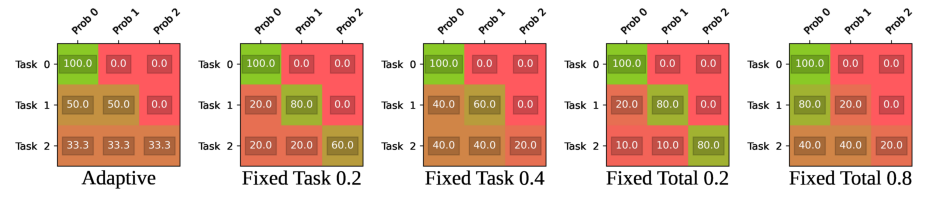

In [79]:
textwidth = 12.7 #cm
fig, ax = plt.subplots(1, 5, figsize=(textwidth, 2.7), sharex=False, sharey=False)
left  = 0  # the left side of the subplots of the figure
right = 1    # the right side of the subplots of the figure
bottom = 0   # the bottom of the subplots of the figure
top = 1    # the top of the subplots of the figure
wspace = 0.0   # the amount of width reserved for blank space between subplots
hspace = 0  # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for i,r in enumerate( res):
    
    ax[i].imshow(r)
    ax[i].set_axis_off()
plt.show()
from visu.visualizer import get_img_from_fig
out = get_img_from_fig(fig, dpi=360)
imageio.imwrite( 'docs/rehearsel_prob.png', out)